<a href="https://colab.research.google.com/github/PabloCaSan/Portfolio/blob/main/Proyecto2_Using-SQL-in-Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using SQL in Python via SQLAlchemy

Some considerations about this notebook:

*   This notebook is going to be written in english as I want to prove my english proficiency.
*   In this notebook I will be using common SQL queries to prove what I know
*   I will use some of the files I worked with during my IBM course


First we start by installing sqlalchemy and the IBM libraries, in case we don't have them yet

In [ ]:
!pip install ibm_db ibm_db_sa
!pip install sqlalchemy==1.3.9

Now we import the libraries we will use

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,7)})
import pandas as pd

And the tool that allows us to use SQL

In [ ]:
%load_ext sql

This tool allows us to use and submit queries within Python, it's like magic!

We will be connecting to IBM DB2 which is a database system and is part of the IBM Cloud Services, to do that we have to write the following line



```
# %sql ibm_db_sa://my-username:my-password@hostname:port/BLUDB?security=SSL
```

With the credentials taken from the DB2 environment as the example shown below (the actual credentials may vary from this):

<img src='https://drive.google.com/uc?id=1YweatUBEn4FLqXBlo63SKseFUFyZ7JLI'>


In [ ]:
%sql ibm_db_sa://gls83869:gLBal8szQhpS4g2V@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30756/BLUDB?security=SSL

'Connected: gls83869@BLUDB'

**Note 1:** In case there are ploblems to connect, we can try the following:

1.   Check the credentials are well written
2.   Reload Google Colab environment
3.   Create new credentials and repeat number 2



**Note 2:** When creating new credentials from the same user, the only change between them is the password, so we don't need to rewrite everything, just remenber number 1.


Now we need some data to work with so let's create some tables

In [ ]:
%%sql

CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (
	country VARCHAR(50),
	first_name VARCHAR(50),
	last_name VARCHAR(50),
	test_score INT
);
INSERT INTO INTERNATIONAL_STUDENT_TEST_SCORES (country, first_name, last_name, test_score)
VALUES
('United States', 'Marshall', 'Bernadot', 54),
('Ghana', 'Celinda', 'Malkin', 51),
('Ukraine', 'Guillermo', 'Furze', 53),
('Greece', 'Aharon', 'Tunnow', 48),
('Russia', 'Bail', 'Goodwin', 46),
('Poland', 'Cole', 'Winteringham', 49),
('Sweden', 'Emlyn', 'Erricker', 55),
('Russia', 'Cathee', 'Sivewright', 49),
('China', 'Barny', 'Ingerson', 57),
('Uganda', 'Sharla', 'Papaccio', 55),
('China', 'Stella', 'Youens', 51),
('Poland', 'Julio', 'Buesden', 48),
('United States', 'Tiffie', 'Cosely', 58),
('Poland', 'Auroora', 'Stiffell', 45),
('China', 'Clarita', 'Huet', 52),
('Poland', 'Shannon', 'Goulden', 45),
('Philippines', 'Emylee', 'Privost', 50),
('France', 'Madelina', 'Burk', 49),
('China', 'Saunderson', 'Root', 58),
('Indonesia', 'Bo', 'Waring', 55),
('China', 'Hollis', 'Domotor', 45),
('Russia', 'Robbie', 'Collip', 46),
('Philippines', 'Davon', 'Donisi', 46),
('China', 'Cristabel', 'Radeliffe', 48),
('China', 'Wallis', 'Bartleet', 58),
('Moldova', 'Arleen', 'Stailey', 38),
('Ireland', 'Mendel', 'Grumble', 58),
('China', 'Sallyann', 'Exley', 51),
('Mexico', 'Kain', 'Swaite', 46),
('Indonesia', 'Alonso', 'Bulteel', 45),
('Armenia', 'Anatol', 'Tankus', 51),
('Indonesia', 'Coralyn', 'Dawkins', 48),
('China', 'Deanne', 'Edwinson', 45),
('China', 'Georgiana', 'Epple', 51),
('Portugal', 'Bartlet', 'Breese', 56),
('Azerbaijan', 'Idalina', 'Lukash', 50),
('France', 'Livvie', 'Flory', 54),
('Malaysia', 'Nonie', 'Borit', 48),
('Indonesia', 'Clio', 'Mugg', 47),
('Brazil', 'Westley', 'Measor', 48),
('Philippines', 'Katrinka', 'Sibbert', 51),
('Poland', 'Valentia', 'Mounch', 50),
('Norway', 'Sheilah', 'Hedditch', 53),
('Papua New Guinea', 'Itch', 'Jubb', 50),
('Latvia', 'Stesha', 'Garnson', 53),
('Canada', 'Cristionna', 'Wadmore', 46),
('China', 'Lianna', 'Gatward', 43),
('Guatemala', 'Tanney', 'Vials', 48),
('France', 'Alma', 'Zavittieri', 44),
('China', 'Alvira', 'Tamas', 50),
('United States', 'Shanon', 'Peres', 45),
('Sweden', 'Maisey', 'Lynas', 53),
('Indonesia', 'Kip', 'Hothersall', 46),
('China', 'Cash', 'Landis', 48),
('Panama', 'Kennith', 'Digance', 45),
('China', 'Ulberto', 'Riggeard', 48),
('Switzerland', 'Judy', 'Gilligan', 49),
('Philippines', 'Tod', 'Trevaskus', 52),
('Brazil', 'Herold', 'Heggs', 44),
('Latvia', 'Verney', 'Note', 50),
('Poland', 'Temp', 'Ribey', 50),
('China', 'Conroy', 'Egdal', 48),
('Japan', 'Gabie', 'Alessandone', 47),
('Ukraine', 'Devlen', 'Chaperlin', 54),
('France', 'Babbette', 'Turner', 51),
('Czech Republic', 'Virgil', 'Scotney', 52),
('Tajikistan', 'Zorina', 'Bedow', 49),
('China', 'Aidan', 'Rudeyeard', 50),
('Ireland', 'Saunder', 'MacLice', 48),
('France', 'Waly', 'Brunstan', 53),
('China', 'Gisele', 'Enns', 52),
('Peru', 'Mina', 'Winchester', 48),
('Japan', 'Torie', 'MacShirrie', 50),
('Russia', 'Benjamen', 'Kenford', 51),
('China', 'Etan', 'Burn', 53),
('Russia', 'Merralee', 'Chaperlin', 38),
('Indonesia', 'Lanny', 'Malam', 49),
('Canada', 'Wilhelm', 'Deeprose', 54),
('Czech Republic', 'Lari', 'Hillhouse', 48),
('China', 'Ossie', 'Woodley', 52),
('Macedonia', 'April', 'Tyer', 50),
('Vietnam', 'Madelon', 'Dansey', 53),
('Ukraine', 'Korella', 'McNamee', 52),
('Jamaica', 'Linnea', 'Cannam', 43),
('China', 'Mart', 'Coling', 52),
('Indonesia', 'Marna', 'Causbey', 47),
('China', 'Berni', 'Daintier', 55),
('Poland', 'Cynthia', 'Hassell', 49),
('Canada', 'Carma', 'Schule', 49),
('Indonesia', 'Malia', 'Blight', 48),
('China', 'Paulo', 'Seivertsen', 47),
('Niger', 'Kaylee', 'Hearley', 54),
('Japan', 'Maure', 'Jandak', 46),
('Argentina', 'Foss', 'Feavers', 45),
('Venezuela', 'Ron', 'Leggitt', 60),
('Russia', 'Flint', 'Gokes', 40),
('China', 'Linet', 'Conelly', 52),
('Philippines', 'Nikolas', 'Birtwell', 57),
('Australia', 'Eduard', 'Leipelt', 53)


 * ibm_db_sa://gls83869:***@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30756/BLUDB
Done.
99 rows affected.


[]

The SQL query from above has created a dataframe within IBM DB2, which looks like this:

<img src='https://drive.google.com/uc?id=1uJacnpmUFihkgYmtbX4TgxtyrmiwALNK'>

And can be further explored in that very environment:

<img src='https://drive.google.com/uc?id=15XIzmcwe9e5a2VGc7BN73JvQ3JhbBmps'>

Or it can be explored using SQL, like the following:

In [ ]:
%%sql 
SELECT * FROM INTERNATIONAL_STUDENT_TEST_SCORES
ORDER BY country, test_score ASC
LIMIT 8;

 * ibm_db_sa://gls83869:***@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30756/BLUDB
Done.


country,first_name,last_name,test_score
Argentina,Foss,Feavers,45
Armenia,Anatol,Tankus,51
Australia,Eduard,Leipelt,53
Azerbaijan,Idalina,Lukash,50
Brazil,Herold,Heggs,44
Brazil,Westley,Measor,48
Canada,Cristionna,Wadmore,46
Canada,Carma,Schule,49


We have successfully replicated the results form the image above

Now let's start exploring the data

In [ ]:
%sql SELECT COUNT(*) FROM INTERNATIONAL_STUDENT_TEST_SCORES;

 * ibm_db_sa://gls83869:***@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30756/BLUDB
Done.


1
99


This tells us that there are 99 rows in the dataframe. Now let's see what is the maximum test score

In [ ]:
%%sql
SELECT MAX(test_score)
FROM INTERNATIONAL_STUDENT_TEST_SCORES;

 * ibm_db_sa://gls83869:***@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30756/BLUDB
Done.


1
60


And the average test score

In [ ]:
%sql SELECT AVG(test_score) FROM INTERNATIONAL_STUDENT_TEST_SCORES

 * ibm_db_sa://gls83869:***@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30756/BLUDB
Done.


1
49


One important thing while exploring and understanding data is to filter it, and since we now know the average score, we can see which students got scores above the average

In [ ]:
%sql SELECT first_name, last_name, test_score FROM INTERNATIONAL_STUDENT_TEST_SCORES WHERE test_score > 49

 * ibm_db_sa://gls83869:***@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30756/BLUDB
Done.


first_name,last_name,test_score
Marshall,Bernadot,54
Celinda,Malkin,51
Guillermo,Furze,53
Emlyn,Erricker,55
Barny,Ingerson,57
Sharla,Papaccio,55
Stella,Youens,51
Tiffie,Cosely,58
Clarita,Huet,52
Emylee,Privost,50


Ok, there are many good students, but how many?

In [ ]:
%%sql
SELECT COUNT(first_name)
FROM INTERNATIONAL_STUDENT_TEST_SCORES
WHERE test_score > 49;

 * ibm_db_sa://gls83869:***@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30756/BLUDB
Done.


1
51


And who is the best?

In [ ]:
%sql SELECT * FROM INTERNATIONAL_STUDENT_TEST_SCORES WHERE test_score=60

 * ibm_db_sa://gls83869:***@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30756/BLUDB
Done.


country,first_name,last_name,test_score
Venezuela,Ron,Leggitt,60


How many not-so-good students?

In [ ]:
%%sql
SELECT COUNT(first_name)
FROM INTERNATIONAL_STUDENT_TEST_SCORES
WHERE test_score <= 49;

 * ibm_db_sa://gls83869:***@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30756/BLUDB
Done.


1
48


Ok, now let's see how many students are from our beloved Mexico

In [ ]:
country = "Mexico"
%sql SELECT * FROM INTERNATIONAL_STUDENT_TEST_SCORES WHERE country = :country

 * ibm_db_sa://gls83869:***@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30756/BLUDB
Done.


country,first_name,last_name,test_score
Mexico,Kain,Swaite,46


Just one student from Mexico, whose name is Kain Swaite and got a score of 46. What about counting how many students are from each country

In [ ]:
%sql SELECT country AS "Country", COUNT(*) AS "Students" FROM INTERNATIONAL_STUDENT_TEST_SCORES GROUP BY country;

 * ibm_db_sa://gls83869:***@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30756/BLUDB
Done.


Country,Students
Argentina,1
Armenia,1
Australia,1
Azerbaijan,1
Brazil,2
Canada,3
China,23
Czech Republic,2
France,5
Ghana,1


Now, as we are working within Python, we can define variables as we normally do. Let's create a variable for a table that has as columns, the Test Score and the number of times a Test Score was repeated (the frequency).

In [ ]:
test_score_distribution = %sql SELECT test_score AS "Test Score", COUNT(*) AS "Frequency" FROM INTERNATIONAL_STUDENT_TEST_SCORES GROUP BY test_score;
test_score_distribution

 * ibm_db_sa://gls83869:***@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30756/BLUDB
Done.


Test Score,Frequency
38,2
40,1
43,2
44,2
45,8
46,7
47,4
48,14
49,8
50,10


Another useful thing about working with SQL inside Python is that we can use the different Python libraries, for example, if we want to plot the data, we can use Matplotlib, Seaborn, etc.

In order to do that, we need to convert the SQL query into a Python dataframe

In [ ]:
df = test_score_distribution.DataFrame()
df

,Test Score,Frequency
0,38,2
1,40,1
2,43,2
3,44,2
4,45,8
5,46,7
6,47,4
7,48,14
8,49,8
9,50,10


And now we can plot using seaborn

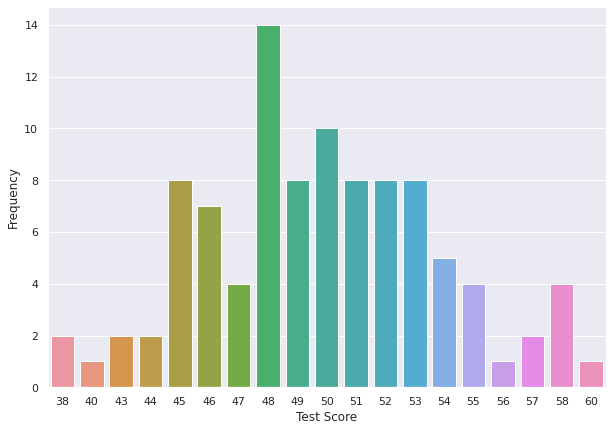

In [ ]:
plot = sns.barplot(x='Test Score',y='Frequency', data=df)

Or using Pandas

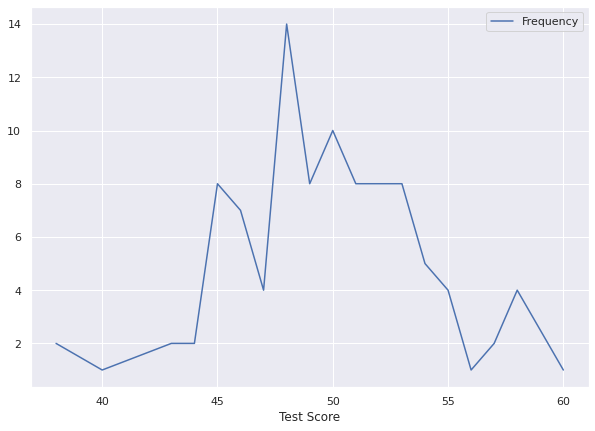

In [ ]:
df.plot(x='Test Score',y='Frequency', figsize=(10,7)) #df.plot.bar would give us a barplot like the one before

Suddenly, the school got a new student

In [ ]:
%%sql
INSERT INTO INTERNATIONAL_STUDENT_TEST_SCORES (country, first_name, last_name, test_score)
VALUES
('Ukraine', 'Anna', 'Bondarenko', 55)

 * ibm_db_sa://gls83869:***@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30756/BLUDB
1 rows affected.


[]

And turns out that our only student from Mexico was actually from Switzerland. What a thing!

In [ ]:
%%sql
UPDATE INTERNATIONAL_STUDENT_TEST_SCORES
SET country = 'Switzerland', first_name = 'Kain', last_name = 'Swaite'
WHERE country = 'Mexico';

 * ibm_db_sa://gls83869:***@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30756/BLUDB
1 rows affected.


[]

And then, sadly our best student moved to another city, so he left the school

In [ ]:
%%sql
DELETE FROM INTERNATIONAL_STUDENT_TEST_SCORES
WHERE test_score=60;

 * ibm_db_sa://gls83869:***@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30756/BLUDB
1 rows affected.


[]

Let's see this changes

In [ ]:
%sql SELECT * FROM INTERNATIONAL_STUDENT_TEST_SCORES WHERE first_name = 'Kain' OR first_name = 'Anna' OR test_score=60

 * ibm_db_sa://gls83869:***@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30756/BLUDB
Done.


country,first_name,last_name,test_score
Switzerland,Kain,Swaite,46
Ukraine,Anna,Bondarenko,55


And if we don't want the table anymore, we can just delete it

In [ ]:
%sql DROP TABLE INTERNATIONAL_STUDENT_TEST_SCORES

 * ibm_db_sa://gls83869:***@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30756/BLUDB
Done.


[]